# 1. Problem Statement

<p>The 2019 Indian general election was held in seven phases from 11 April to 19 May 2019 to elect the members of the 17th Lok Sabha.</p>
<p>The Bharatiya Janata Party (BJP) won a landslide victory, winning 303 seats and forming the government.The BJP's alliance partners won 50 seats, giving the NDA a total of 353 seats.</p>
<p>The Indian National Congress (INC) won 52 seats, its lowest number of seats since 1984.</p>
<p>Our task is to analyze the results and gain helpful insights from it</p>

these libraries will help us in analyzing our data. The 4 libraries below are the most commonly used. However, we will import
other libraries later if need arises

# 2. Gathering the Data

## Importing the Dependencies

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (14,6)
%matplotlib inline

## Loading the Dataset

Citation
<p>Data: “TCPD Individual Incumbency Dataset, 1962-current”. Trivedi Centre for Political Data, Ashoka University.<p>
<p>Info about the variables available at <a href = 'chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://lokdhaba.ashoka.edu.in/static/media/2022Feb12LokDhabaCodebook.21040cf7.pdf'>this</a> link</p>

In [564]:
df = pd.read_csv('All_States_GE.csv')
print("Data Loaded Succesfully")

Data Loaded Succesfully


C:\Users\Apoorva Jha\AppData\Local\Temp\ipykernel_18784\536651462.py:1: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('All_States_GE.csv')


## Preliminary Examination of Given Data

In [302]:
df.head()

,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,KULDEEP RAI SHARMA,M,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,VISHAL JOLLY,M,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,PARITOSH KUMAR HALDAR,M,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,SANJAY MESHACK,M,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,PRAKASH MINJ,M,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)


In [303]:
print('The data has', df.shape[0], ' rows and ', df.shape[1],'columns.')

The data has 91669  rows and  45 columns.


In [304]:
for column in df.columns:
    print("Column-->",column,"; Data type-->", df[column].dtype )

Column--> State_Name ; Data type--> object
Column--> Assembly_No ; Data type--> int64
Column--> Constituency_No ; Data type--> int64
Column--> Year ; Data type--> int64
Column--> month ; Data type--> float64
Column--> Poll_No ; Data type--> int64
Column--> DelimID ; Data type--> int64
Column--> Position ; Data type--> int64
Column--> Candidate ; Data type--> object
Column--> Sex ; Data type--> object
Column--> Party ; Data type--> object
Column--> Votes ; Data type--> float64
Column--> Candidate_Type ; Data type--> object
Column--> Valid_Votes ; Data type--> int64
Column--> Electors ; Data type--> float64
Column--> Constituency_Name ; Data type--> object
Column--> Constituency_Type ; Data type--> object
Column--> Sub_Region ; Data type--> object
Column--> N_Cand ; Data type--> int64
Column--> Turnout_Percentage ; Data type--> float64
Column--> Vote_Share_Percentage ; Data type--> float64
Column--> Deposit_Lost ; Data type--> object
Column--> Margin ; Data type--> float64
Column--> Marg

# 3. Data Preprocessing

## Removing Trivially Non-Useful Columns

### Assembly_No and Year

In [305]:
df['Assembly_No'].describe()

count    91669.000000
mean        11.447360
std          3.792191
min          3.000000
25%          9.000000
50%         11.000000
75%         15.000000
max         17.000000
Name: Assembly_No, dtype: float64

It Clearly is the # of General election. Therefore, lets keep rows where the assembly no = 17 and the year = 2019

In [306]:
df = df[(df['Assembly_No'] == 17) & (df['Year'] == 2019)]

In [307]:
print("The updated dataframe has ", df.shape[0], " rows" )

The updated dataframe has  8613  rows


We have substantially reduced our problem

Now, we can drop both Assembly_No and year

In [308]:
df = df.drop( columns = ['Assembly_No', 'Year'], axis = 1)

In [309]:
df.shape

(8613, 43)

### Election_Type

In [310]:
df['Election_Type'].unique()

array(['Lok Sabha Election (GE)'], dtype=object)

That was a bit obvious. Lets drop this column

In [311]:
df.drop(columns = ['Election_Type'], axis = 1, inplace = True)

### DelimID

In [312]:
df['DelimID'].unique()

array([4], dtype=int64)

now the delimID is same for all rows, so that might not be of so much use. Lets drop it

In [313]:
df = df.drop( columns = ['DelimID'], axis = 1)

### month

month is supposed to be the month in which results were declared. Lets drop this too

In [314]:
df.drop( columns = ['month'], axis = 1, inplace = True)

### Profession Description

To make our work less cumbersome, we can drop the descriptions and just keep the professions.

In [315]:
df.drop(columns = ['TCPD_Prof_Second_Desc','TCPD_Prof_Main_Desc'], axis = 1, inplace = True)

In [316]:
df.Poll_No.value_counts()

0    8596
1      17
Name: Poll_No, dtype: int64

Now that we have removed 7 out of 45 columns without any significant loss of information, we can move forward

## Removing Duplicates

In [317]:
df[df.duplicated(['pid', 'Candidate', 'State_Name', 'Constituency_No']) & (df['Candidate'] != 'NOTA')]

,State_Name,Constituency_No,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,...,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Second


So, there are no duplicate rows as such. We can move on

## Handling Null Values

In [318]:
df.isnull().sum()

State_Name                   0
Constituency_No              0
Poll_No                      0
Position                     0
Candidate                    0
Sex                        544
Party                        2
Votes                        0
Candidate_Type            5485
Valid_Votes                  0
Electors                     0
Constituency_Name            0
Constituency_Type            0
Sub_Region                7554
N_Cand                       0
Turnout_Percentage           0
Vote_Share_Percentage        0
Deposit_Lost               544
Margin                       0
Margin_Percentage            0
ENOP                         0
pid                        544
Party_Type_TCPD             28
Party_ID                    17
last_poll                    0
Contested                  544
Last_Party                7298
Last_Party_ID             7300
Last_Constituency_Name    7298
Same_Constituency         7298
Same_Party                7298
No_Terms                   544
Turncoat

There are a lot of null values and its not at all desirable in a dataset. We need to do something about it. Lets go over them one by one

### Sex

In [319]:
df['Sex'].isnull().sum()

544

In [320]:
df[df['Candidate'] == 'NOTA'].shape[0]

544

In [321]:
df[( df['Candidate'] != 'NOTA' ) & (df['Sex'].isnull() == True)]

,State_Name,Constituency_No,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,...,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Second


From the above 3 lines of code, it is clear that the places where the sex row is missing is occupied by NOTA. For our analysis Purpose, lets fill it with 'NOTA'

In [322]:
df['Sex'].fillna( 'NOTA', inplace = True)

### Party

In [323]:
df[df['Party'].isnull() == True]

,State_Name,Constituency_No,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,...,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Second
8599,Bihar,23,1,4,NOTA,NOTA,NaN,25694.0,NaN,788679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8609,Maharashtra,45,1,5,NOTA,NOTA,NaN,10159.0,NaN,1254637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 'NOTA' Candidate in the by-elections has not been given a Party. We will see what party NOTA has been given in other places, and then replace it with that

In [324]:
df[df['Candidate'] == 'NOTA'].Party.unique()

array(['NOTA', nan], dtype=object)

In [325]:
df['Party'].fillna('NOTA', inplace = True)

### Candidate_Type

In [326]:
df['Candidate_Type'].isnull().sum()/len(df)

0.6368280506211541

63% of the candidate_Type values are missing

In [327]:
df[df['Candidate_Type'].isnull() == False]['Candidate_Type'].unique()

array(['GEN', 'ST', 'SC', 'GENERAL'], dtype=object)

Clearly, NOTA has no Candidate_Type . Lets just name it 'NOTA'

In [328]:
df.loc[(df['Candidate'] == 'NOTA') & (df['Candidate_Type'].isnull()), 'Candidate_Type'] = 'NOTA'

In [329]:
df['Candidate_Type'].isnull().sum()

4941

In [330]:
df.loc[(df['Candidate_Type'] == 'GENERAL'), 'Candidate_Type'] = 'GEN'

Now, as only SC or ST candidates can fill their respective seats, wherever the constituency_Type is SC or ST, we set the candidate_Type to that value

In [331]:
df.loc[( (df['Constituency_Type'] == 'SC') | (df['Constituency_Type'] == 'ST')&(df['Candidate_Type'].isnull() == True) ), 'Candidate_Type'] = df['Constituency_Type']

In [332]:
df['Candidate_Type'].isnull().sum()

4931

Sadly, we could not get much done using the above technique. Now looking at the name we can predict the Candidate_Type but lets leave that for another day. Lets preserve the missing values by replacing them with 'UNKNOWN'

In [333]:
df.loc[(df['Candidate_Type'].isnull()), 'Candidate_Type'] = 'UNKNOWN'

### Sub_region

In [334]:
df['Sub_Region'].isnull().sum()/len(df)

0.8770463253221874

87% of the values are missing here. Given the relative importance of this column that we can percieve and the no of missing values, lets just drop this column

In [335]:
df.drop(columns = ['Sub_Region'], inplace = True)

### Deposit_Lost

There are 544 missing values here. It might be the same case that we had with 'Sex'. We can replace the missing values with 0, as no money was lost

In [336]:
df.loc[(df['Deposit_Lost'].isnull())&(df['Candidate'] == 'NOTA'), 'Deposit_Lost'] = 0

In [337]:
df['Deposit_Lost'].isnull().sum()

0

Our Suspicion was correct, and we are done here

### pid

Again, NOTA is probably the troublemaker here

In [338]:
df.loc[(df['pid'].isnull())&(df['Candidate'] == 'NOTA'), 'pid'] = 'NOTA'

In [339]:
df['pid'].isnull().sum()

0

Yes, we have to recognize these patterns and use logic before we leverage the power of code

### No_Terms, Turncoat, Incumbent, Recontest and Contested

All these columns have 544 missing values. Lets handle them too and check. We replace No_Turns with 0, Turncoat with 0, Incumbent with 0, Recontest with 0

In [342]:
columns = ['No_Terms', 'Turncoat', 'Incumbent', 'Recontest', 'Contested']
for column in columns :
    df.loc[(df[column].isnull())&(df['Candidate'] == 'NOTA'), column] = 0
    print( column, df[column].isnull().sum())

No_Terms 0
Turncoat 0
Incumbent 0
Recontest 0
Contested 0


We are done with the 544 Schedule

### Party_Type_TCPD

First lets see what are the various party types

In [359]:
df['Party_Type_TCPD'].unique()

array(['National Party', 'Independents',
       'State-based Party (Other State)', 'NOTA', 'Local Party',
       'State-based Party', nan], dtype=object)

In [349]:
df[(df['Party'] == 'IND')]['Party_Type_TCPD']

2       Independents
7       Independents
8       Independents
9       Independents
10      Independents
            ...     
8601             NaN
8602             NaN
8607             NaN
8610             NaN
8611             NaN
Name: Party_Type_TCPD, Length: 3466, dtype: object

Party_Type_TCPD is Independents for Independent Candidates, and we also have some missing values there. Lets fill them

In [355]:
df.loc[((df['Party'] == 'IND')  & df['Party_Type_TCPD'].isnull()), 'Party_Type_TCPD'] = 'Independents'

In [352]:
df[(df['Candidate'] == 'NOTA')]['Party_Type_TCPD']

6       NOTA
18      NOTA
30      NOTA
40      NOTA
56      NOTA
        ... 
8571    NOTA
8583    NOTA
8591    NOTA
8599     NaN
8609     NaN
Name: Party_Type_TCPD, Length: 544, dtype: object

lets repeat the above procedure for NOTA as well

In [353]:
df.loc[((df['Candidate'] == 'NOTA')  & df['Party_Type_TCPD'].isnull()), 'Party_Type_TCPD'] = 'NOTA'

In [356]:
df['Party_Type_TCPD'].isnull().sum()

20

Lets see what remains

In [358]:
df[(df['Party_Type_TCPD'].isnull())]['Party']

1442                       ssrd
1523                       ssrd
1590                       ssrd
3185                        igp
3721                       ssrd
4289                       ssrd
4368                       ssrd
6989                       svjn
7099                       svjn
7643                       ssrd
7991                        igp
8596                        LJP
8597                        INC
8600          Jan Adhikar Party
8603      Yuva Krantikari Party
8604        Wazib Adhikar Party
8605                        NCP
8606                        BJP
8608    Vanchit Bahujan Aaghadi
8612      Hindustan Janta Party
Name: Party, dtype: object

Turns out Sanatan Sanskriti Raksha Dal is unrecognized. Therefore, we will fill it with 'Local Party'. The IGP is also unrecognized. The LJP is a state based party in bihar, INC ofcourse is a national party, so is the BJP. The NCP is a state based party.The Hindustan Janta Party is an unrecongnized party. Lets treat all others as unrecognized

In [360]:
df.loc[(((df['Party'] == 'INC') | (df['Party'] == 'BJP')) & (df['Party_Type_TCPD'].isnull())), 'Party_Type_TCPD'] = 'National Party'

In [361]:
df.loc[(((df['Party'] == 'LJP') | (df['Party'] == 'NCP')) & (df['Party_Type_TCPD'].isnull())), 'Party_Type_TCPD'] = 'State-based Party'

In [362]:
df['Party_Type_TCPD'].isnull().sum()

16

In [363]:
df['Party_Type_TCPD'].fillna('Local Party', inplace = True)

### Last_Party ,Last_Party_ID, Last_Constituency_Name,Same_Constituency, Same_Party

These have a lot of missing values. But, it can be for candidates who are contesting for the first time. Wherever this is the case, lets make it 'NA'

In [368]:
df.loc[(df['Contested'] == 1), 'Last_Party'] = 'NA'

In [369]:
df.loc[(df['Contested'] == 1), 'Last_Party_ID'] = 'NA'

In [370]:
df.loc[(df['Contested'] == 1), 'Last_Constituency_Name'] = 'NA'

In [371]:
df.loc[(df['Contested'] == 1), 'Same_Constituency'] = 'NA'

In [372]:
df.loc[(df['Contested'] == 1), 'Same_Party'] = 'NA'

Now, Most probably NOTA Values remain

In [374]:
df.loc[(df['Candidate'] == 'NOTA'), 'Last_Party'] = 'NA'

In [375]:
df.loc[(df['Candidate'] == 'NOTA'), 'Last_Party_ID'] = 'NA'

In [376]:
df.loc[(df['Candidate'] == 'NOTA'), 'Last_Constituency_Name'] = 'NA'

In [377]:
df.loc[(df['Candidate'] == 'NOTA'), 'Same_Constituency'] = 'NA'

In [378]:
df.loc[(df['Candidate'] == 'NOTA'), 'Same_Party'] = 'NA'

### Profession and Education

We will drop the secondary profession Column, and fill the remaining values of education  and main profession. Wherever the Candidate is NOTA, we will fill NOTA, otherwise, we fill unknown.

In [387]:
df.drop(columns = ['TCPD_Prof_Second'], axis = 1, inplace = True)

In [388]:
df.loc[((df['Candidate'] == 'NOTA') & (df['TCPD_Prof_Main'].isnull())), 'TCPD_Prof_Main'] = 'NOTA'

In [391]:
df.loc[((df['Candidate'] == 'NOTA') & (df['MyNeta_education'].isnull())), 'MyNeta_education'] = 'NOTA'

Now, Lets fill all the other values as 'unknown'

In [396]:
df.loc[(df['MyNeta_education'].isnull()), 'MyNeta_education'] = 'unknown'

In [397]:
df.loc[(df['TCPD_Prof_Main'].isnull()), 'TCPD_Prof_Main'] = 'unknown'

Now, lets review all the missing values one last time before we proceed.

In [398]:
df.isnull().sum()

State_Name                 0
Constituency_No            0
Poll_No                    0
Position                   0
Candidate                  0
Sex                        0
Party                      0
Votes                      0
Candidate_Type             0
Valid_Votes                0
Electors                   0
Constituency_Name          0
Constituency_Type          0
N_Cand                     0
Turnout_Percentage         0
Vote_Share_Percentage      0
Deposit_Lost               0
Margin                     0
Margin_Percentage          0
ENOP                       0
pid                        0
Party_Type_TCPD            0
Party_ID                  17
last_poll                  0
Contested                  0
Last_Party                 0
Last_Party_ID              2
Last_Constituency_Name     0
Same_Constituency          0
Same_Party                 0
No_Terms                   0
Turncoat                   0
Incumbent                  0
Recontest                  0
MyNeta_educati

### Last_Party_ID and Party_ID

Our Qualitiative Analysis Will NOT be affected much by Party_ID or Last_Party_ID anyways because for a single election, the party names are unique and can be used as identifiers

# 4. Exploratory Data Analysis

Finally after a lot of work, we have reached here. We have made the data a bit more suitable for analysis and can now Proceed

## Broad Categories

<p> We will be performing various analysis, but lets try to classify them broadly.</p>
<ol>
    <li>Winner  Analysis</li>
     <li>State-Wise Analysis</li>
     <li>Overall Analysis</li>
</ol>

</p>This part often involves asking a lot of questions, so lets take each category and ask a lot of questions.</p>
</p> We will try to keep our code clean by making use of good programming practices like classes, functions and refactoring.</p>

## Winner Analysis

In [434]:
winner_data = df[df['Position'] == 1]

In [422]:
winner_data.shape[0]

545

### What is the gender of the winners ?

In [428]:
winner_sex = winner_data['Sex'].unique()

In [429]:
winner_sex

array(['M', 'F', 'MALE'], dtype=object)

Let us go and replace 'MALE' with M in the original data

In [432]:
df.loc[(df['Sex'] == 'MALE'), 'Sex'] = 'M'

In [435]:
winner_sex = winner_data['Sex'].unique()
winner_sex

array(['M', 'F'], dtype=object)

In [441]:
 winner_sex_count = winner_data['Sex'].value_counts()

M    467
F     78
Name: Sex, dtype: int64

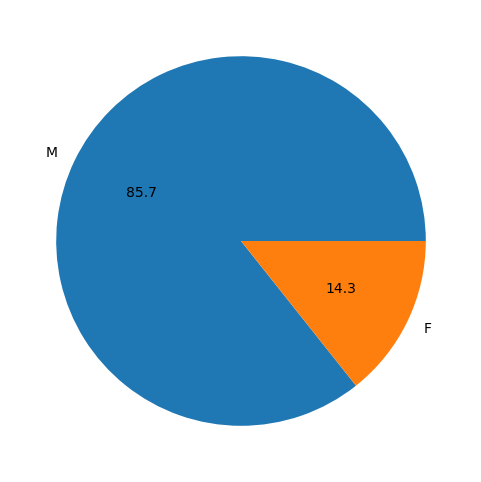

In [452]:
plt.pie( x = winner_sex_count, labels = winner_sex, autopct = '%0.1f')
plt.show()

### How many winners were contesting for the first time ?

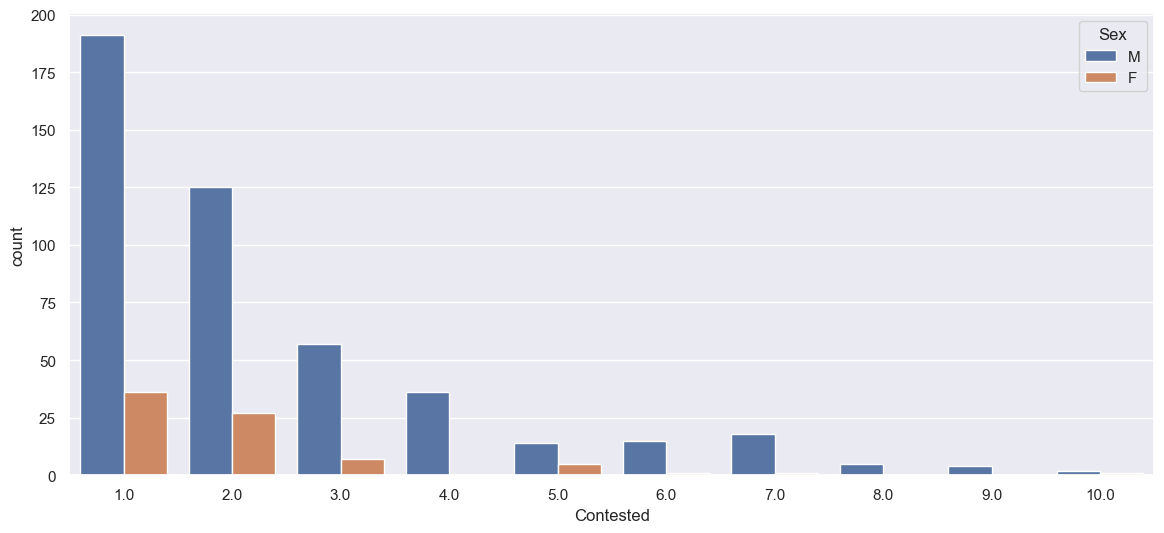

In [475]:
sns.set_theme(style = 'darkgrid')
sns.countplot( data = winner_data, x = 'Contested', hue = 'Sex')
plt.show()

 Most Number of winners were contesting for the first time ever. This shows people really want to see new faces in politics

Also, No contesting women had contested more than 5 times before. Although thats a lot of years, still men have the edge


### How many winners were loyal to their previous party and how many were turncoats ?

In [501]:
same_party = winner_data['Same_Party'].value_counts()

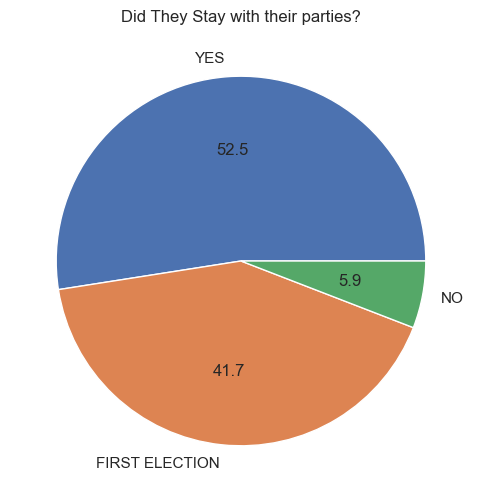

In [502]:
plt.pie( x = same_party, labels = ['YES', 'FIRST ELECTION', 'NO'], autopct = '%0.1f')
plt.title('Did They Stay with their parties?')
plt.show()

In [510]:
winner_data[winner_data['Turncoat'] == True].shape[0]

29

In [511]:
df[df['Turncoat'] == True].shape[0]

195

Only 29 out of 195 Turncoats won.

### What Professions are the winners involved in ?

In [516]:
winner_professions = winner_data['TCPD_Prof_Main'].unique()[:5]
for profession in winner_professions:
    print(profession)

Business
Social Work
Politics
Liberal Profession or Professional
Other


These are the top 5 Professions. Now lets visualize the educational qualifications of our winners

### What are the educational qualifications of our representatives?

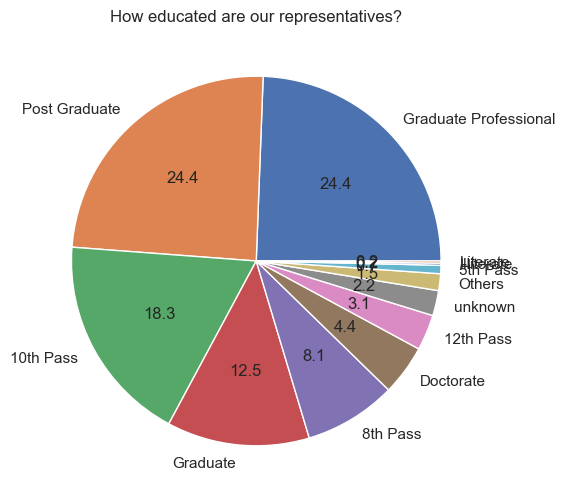

In [531]:
winner_degrees = winner_data['MyNeta_education'].unique()
winner_degree_counts = winner_data['MyNeta_education'].value_counts()
plt.pie( x = winner_degree_counts, labels = winner_degrees, autopct = '%0.1f')
plt.title("How educated are our representatives?")
plt.show()

More than 65% of our representatives are graduate, or more qualified.This is actually a positive sign, as educated politicians are a very big factor towards a country's development.

### Do we really need reservations here?

We will see how successful are SC and ST candidates on General Seats.

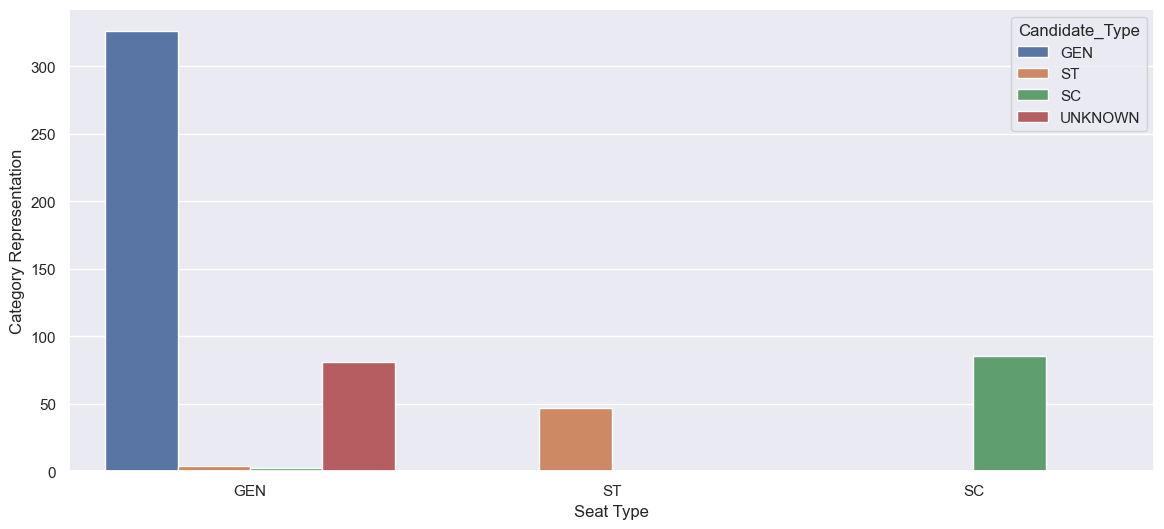

In [545]:
sns.countplot( data = winner_data, x = 'Constituency_Type', hue = 'Candidate_Type')
plt.xlabel('Seat Type')
plt.ylabel('Category Representation')
plt.show()

Clearly, SC/ST winners on general seatsis nearly neglegible. Even if all unknowns were reserved, that would still not make the right proportion.

### What does the distribution of Vote Share Percentage of winners look like?

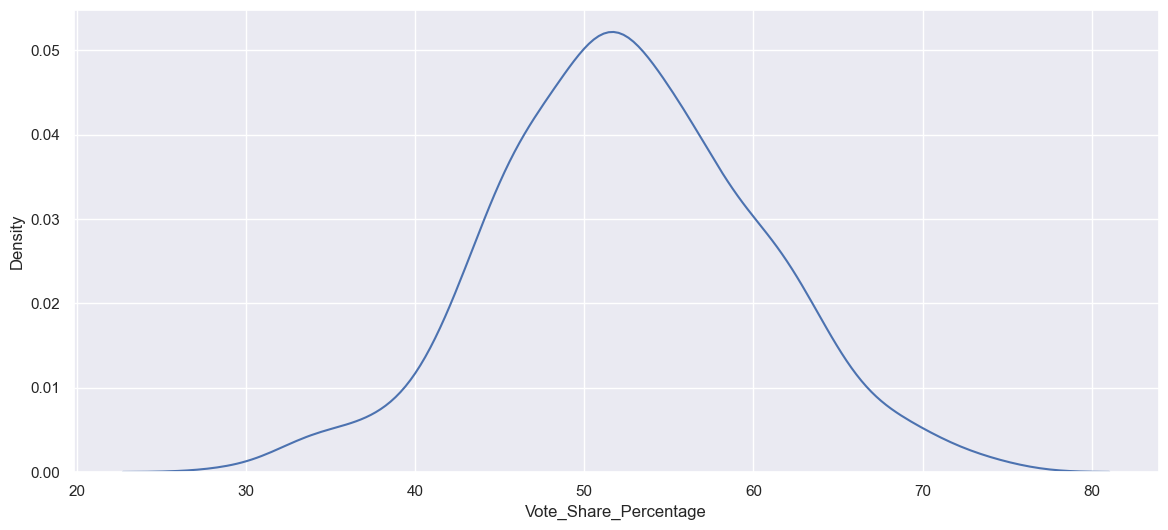

In [549]:
sns.kdeplot( x = winner_data['Vote_Share_Percentage'])
plt.show()

In [550]:
winner_data['Vote_Share_Percentage'].skew()

0.03433901421666577

Like all good things in nature, it is almost normally distributed

### What was the most convincing win and who had the lowest public support among winners ?

In [553]:
winner_data['Vote_Share_Percentage'].describe()

count    545.000000
mean      52.495284
std        7.718677
min       29.290000
25%       47.290000
50%       52.270000
75%       57.210000
max       74.470000
Name: Vote_Share_Percentage, dtype: float64

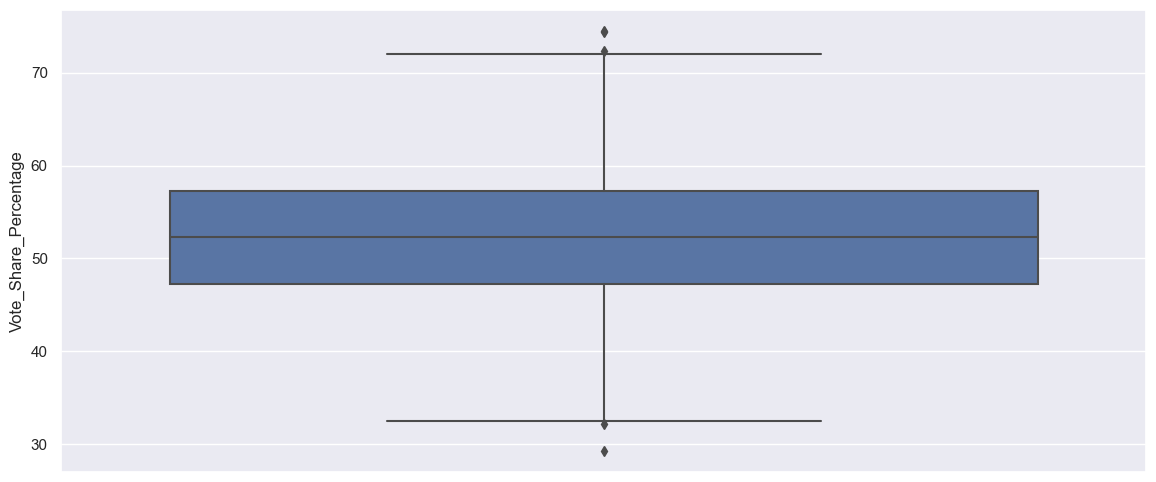

In [558]:
sns.boxplot( y = winner_data['Vote_Share_Percentage'] )
plt.show()

In [560]:
winner_data[winner_data['Vote_Share_Percentage']==74.47]

,State_Name,Constituency_No,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,...,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main
1962,Gujarat,24,0,1,Darshana Vikram Jardosh,F,BJP,795651.0,GEN,1068412,...,1605.0,SURAT,True,True,3.0,False,True,True,Graduate,Social Work


This extraordinary feat was achieved by Darshana Vikram Jardosh of BJP in Surat. This was her 3rd win, and she was also incumbent at the time of elections.

In [561]:
winner_data[winner_data['Vote_Share_Percentage']==29.29]

,State_Name,Constituency_No,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,...,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main
2294,Jammu_&_Kashmir,1,0,1,MOHAMMAD AKBAR LONE,M,JKN,133426.0,UNKNOWN,455550,...,NA,NA,NA,NA,1.0,False,False,False,Graduate Professional,Liberal Profession or Professional


On the Other hand, Mohammad Akbar Lone of the JKN barely got by. But we should not be too harsh on him, it was his first election

### Who had enough courage to go to a different constituency and win the election ? 

In [563]:
winner_data[winner_data['Same_Constituency'] == False]

,State_Name,Constituency_No,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,...,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main
144,Andhra_Pradesh,11,0,1,BALASHOWRY VALLABHANENI,M,YSRCP,572850.0,GEN,1244570,...,8615.0,GUNTUR,False,True,2.0,False,False,True,Post Graduate,Business
521,Assam,14,0,1,PRADAN BARUAH,M,BJP,776406.0,UNKNOWN,1283589,...,1605.0,"LAKHIMPUR , DISTRICT, LAKHIMPUR",False,True,2.0,False,True,True,12th Pass,Agriculture
732,Bihar,13,0,1,Dinesh Chandra Yadav,M,JD(U),624334.0,GEN,1147274,...,11002.0,KHAGARIA,False,True,4.0,False,False,True,Graduate Professional,Retired or Pension
903,Bihar,24,0,1,Giriraj Singh,M,BJP,692193.0,GEN,1225594,...,1605.0,NAWADA,False,True,2.0,False,True,True,Graduate,Social Work
1262,Chhattisgarh,3,0,1,GUHARAM AJGALLEY,M,BJP,572790.0,SC,1247650,...,1605.0,SARANGARH,False,True,2.0,False,False,False,Graduate Professional,Politics
1413,Dadra_&_Nagar_Haveli,1,0,1,DELKAR MOHANBHAI SANJIBHAI,M,IND,90421.0,ST,198983,...,3482.0,DADAR & NAGAR HAVELI,False,False,7.0,False,False,True,Graduate,Politics
2151,Haryana,7,0,1,ARVIND KUMAR SHARMA,M,BJP,573845.0,GEN,1220571,...,3482.0,KARNAL,False,False,4.0,True,False,True,Post Graduate,Retired or Pension
2466,Jharkhand,6,0,1,Chandra Prakash Choudhary,M,AJSUP,648277.0,GEN,1106918,...,8958.0,HAZARIBAGH,False,True,1.0,False,False,False,Graduate,Politics
2558,Jharkhand,11,0,1,ARJUN MUNDA,M,BJP,382638.0,ST,832377,...,1605.0,JAMSHEDPUR,False,True,2.0,False,False,False,12th Pass,Politics
3152,Kerala,3,0,1,K. MURALEEDHARAN,M,INC,526755.0,GEN,1065619,...,5792.0,WAYANAD,False,False,4.0,True,False,False,Graduate,Politics


On a total of 40 seats, the public welcomed 'Outsiders'